In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [39]:
data = pd.read_csv("Medicalpremium.csv")
data

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000
...,...,...,...,...,...,...,...,...,...,...,...
981,18,0,0,0,0,169,67,0,0,0,15000
982,64,1,1,0,0,153,70,0,0,3,28000
983,56,0,1,0,0,155,71,0,0,1,29000
984,47,1,1,0,0,158,73,1,0,1,39000


## data cleaning

In [40]:
missing_values=data.isnull().sum()
print(missing_values)

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64


## distribution of premiumprice

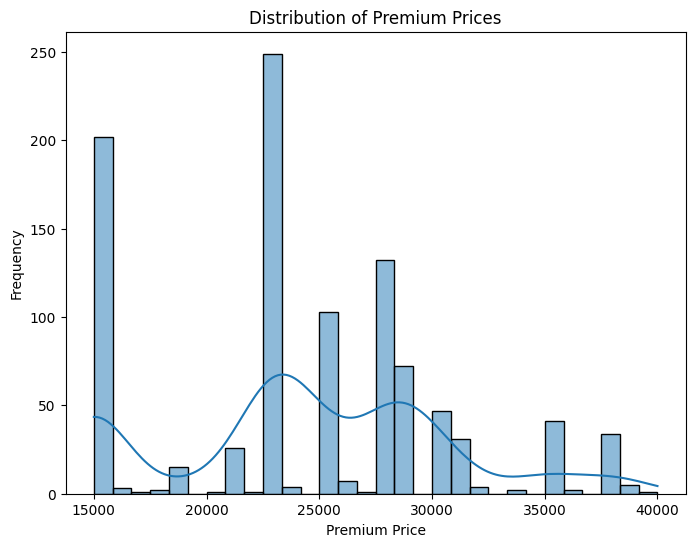

In [41]:
plt.figure(figsize=(8, 6))
sns.histplot(data["PremiumPrice"], bins=30, kde=True)
plt.title("Distribution of Premium Prices")
plt.xlabel("Premium Price")
plt.ylabel("Frequency")
plt.show()

## correlation heatmap

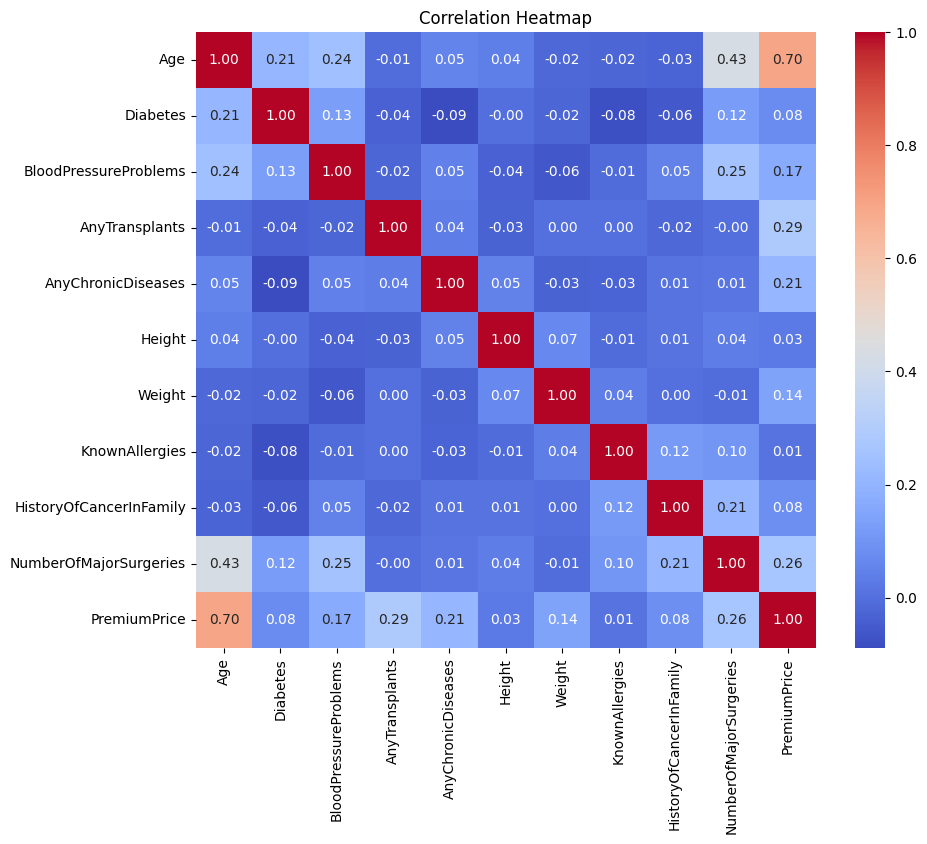

In [42]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## feature scaling

In [43]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop(columns=["PremiumPrice"]))
scaled_data = pd.DataFrame(scaled_features, columns=data.drop(columns=["PremiumPrice"]).columns)

In [44]:
scaled_data["PremiumPrice"] = data["PremiumPrice"]
scaled_data.to_csv("scaled_dataset.csv", index=False)

In [45]:
data=pd.read_csv('scaled_dataset.csv')

In [46]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

## splitting dataset

In [47]:
x = data.drop(columns=["PremiumPrice"])
y = data["PremiumPrice"]

In [48]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## model selection

In [49]:
models = {
    "XGBoost": XGBRegressor(),
    "GBM": GradientBoostingRegressor(),
    "RandomForest": RandomForestRegressor()
}

## hyperparameter tuning

In [50]:
param_grids = {
    "XGBoost": {
        "n_estimators": [100, 200, 300],
        "max_depth": [3, 5, 7],
        "learning_rate": [0.01, 0.05, 0.1]
    },
    "GBM": {
        "n_estimators": [100, 200, 300],
        "max_depth": [3, 5, 7],
        "learning_rate": [0.01, 0.05, 0.1]
    },
    "RandomForest": {
        "n_estimators": [100, 200, 300],
        "max_depth": [None, 5, 10],
        "min_samples_split": [2, 5, 10]
    }
}

In [51]:
best_models = {}

for name, model in models.items():
    param_grid = param_grids[name]
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring="neg_mean_squared_error")
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    best_models[name] = best_model

    print(f"Best parameters for {name} model: {grid_search.best_params_}")
    print(f"Best score for {name} model: {grid_search.best_score_}\n")

Best parameters for XGBoost model: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}
Best score for XGBoost model: -9173547.36761467

Best parameters for GBM model: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
Best score for GBM model: -9494172.383067107

Best parameters for RandomForest model: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 300}
Best score for RandomForest model: -8459413.806209335



## model evaluation

In [52]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [53]:
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mape = (abs((y_test - y_pred) / y_test)).mean() * 100

    print(f"Evaluation metrics for {name} model:")
    print(f"R-squared: {r2}")
    print(f"Mean Absolute Error: {mae}")
    print(f"Root Mean Squared Error: {rmse}")
    print(f"Mean Absolute Percentage Error: {mape}\n")

Evaluation metrics for XGBoost model:
R-squared: 0.8757148291999248
Mean Absolute Error: 1449.5061503708964
Root Mean Squared Error: 2302.143920656941
Mean Absolute Percentage Error: 6.020012125998191

Evaluation metrics for GBM model:
R-squared: 0.8723614548532108
Mean Absolute Error: 1514.1312185808395
Root Mean Squared Error: 2332.994615227405
Mean Absolute Percentage Error: 6.246738577048374

Evaluation metrics for RandomForest model:
R-squared: 0.89691532478044
Mean Absolute Error: 1017.737345138635
Root Mean Squared Error: 2096.6206899630656
Mean Absolute Percentage Error: 4.420688282708143



## models learning curve

In [54]:
import numpy as np
from sklearn.model_selection import learning_curve

def plot_learning_curve(name,estimator, X, y, cv, train_sizes=np.linspace(0.1, 1.0, 10), scoring=None):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, train_sizes=train_sizes, scoring=scoring)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.title(f"Learning Curve for {name}")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.grid()
    plt.show()


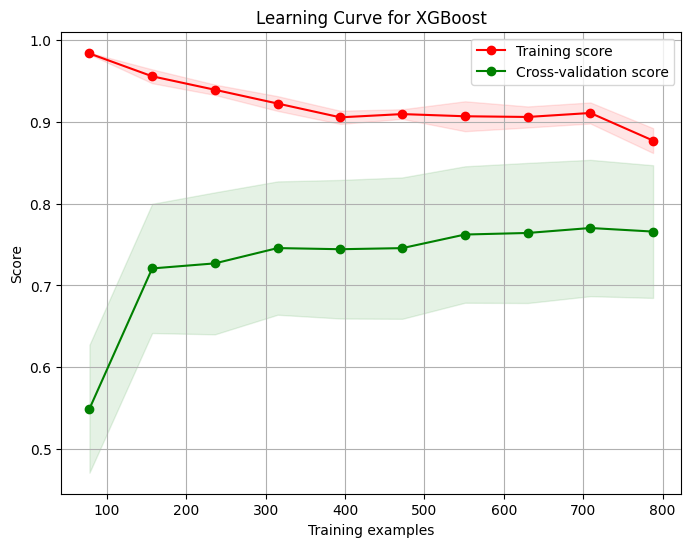

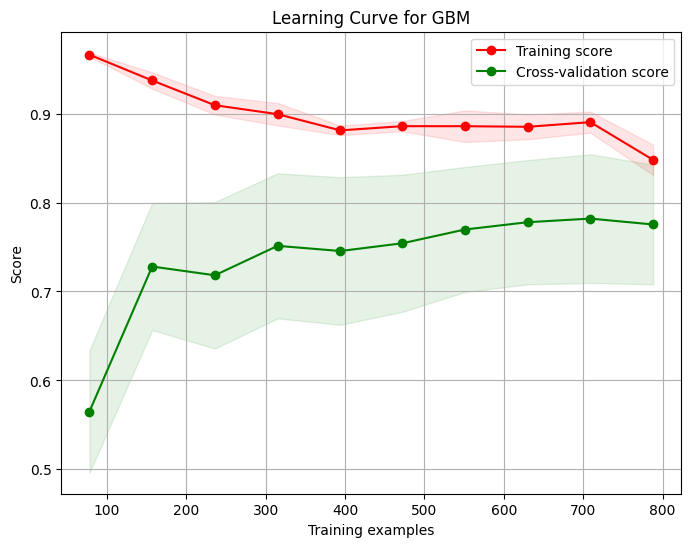

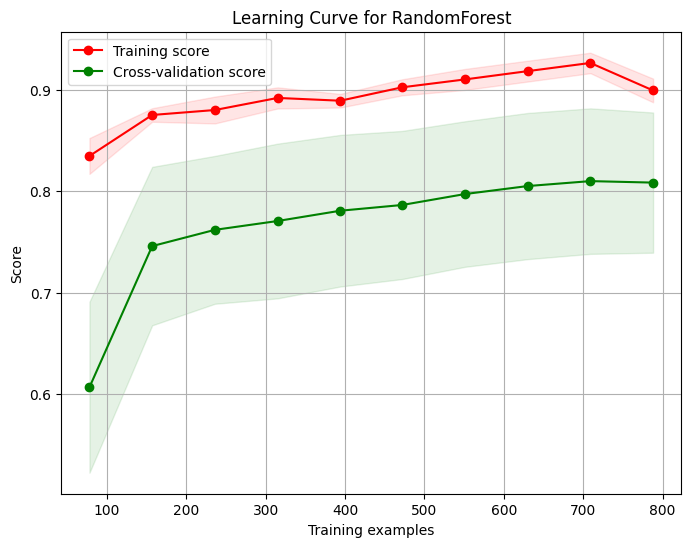

In [55]:
for name, model in best_models.items():
  plot_learning_curve(name,model, x, y, cv=5, scoring='r2')

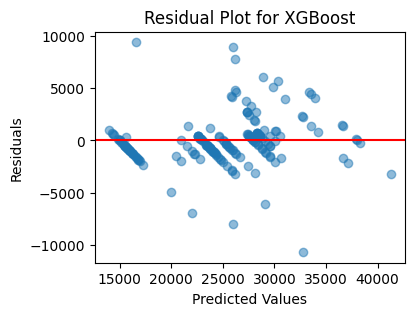

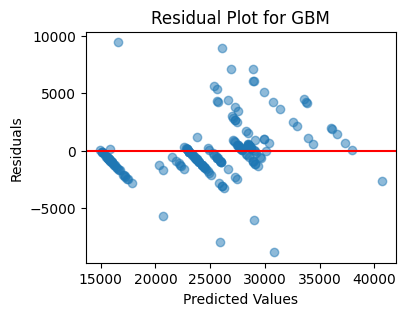

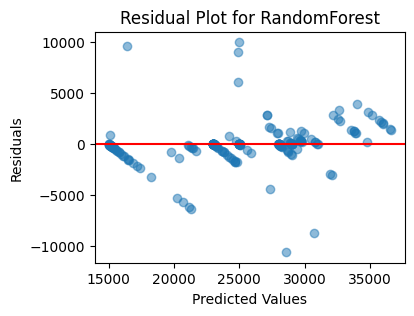

In [56]:
for name, model in best_models.items():
  predicted_values = model.predict(X_test)
  residuals = y_test - predicted_values
  plt.figure(figsize=(4, 3))
  plt.scatter(predicted_values, residuals, alpha=0.5)
  plt.title(f'Residual Plot for {name}')
  plt.xlabel('Predicted Values')
  plt.ylabel('Residuals')
  plt.axhline(y=0, color='r', linestyle='-')
  plt.show()

## Best fit model

In [57]:
random_forest_model = best_models["RandomForest"]
random_forest_model.fit(x, y)

RandomForestRegressor(min_samples_split=10, n_estimators=300)

## SHAP

In [58]:
!pip install shap
import shap

In [59]:
explainer = shap.Explainer(random_forest_model)
shap_values = explainer.shap_values(x)

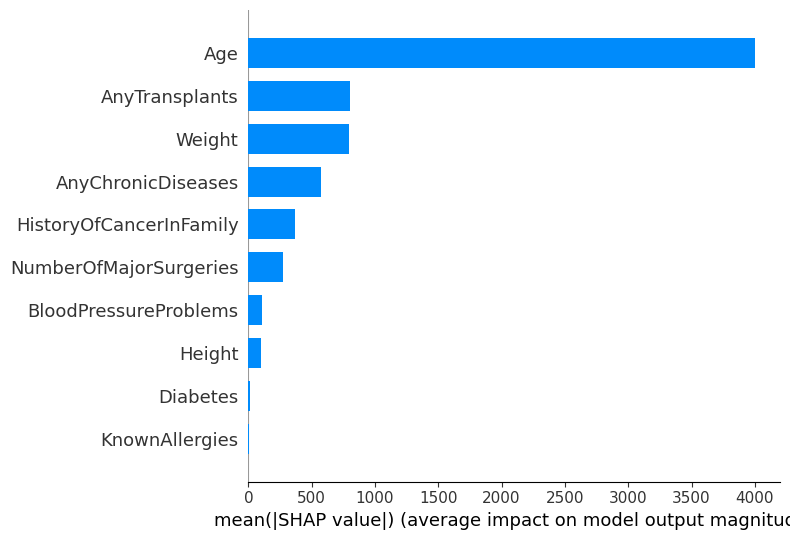

In [60]:
shap.summary_plot(shap_values, x, plot_type="bar")

## C-ICE plots

In [61]:
pip install pycebox

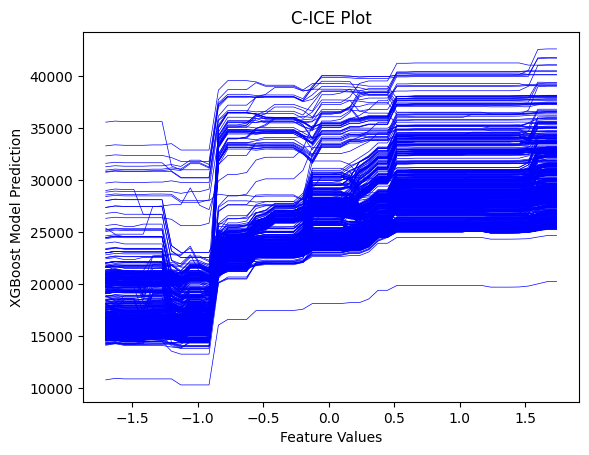

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


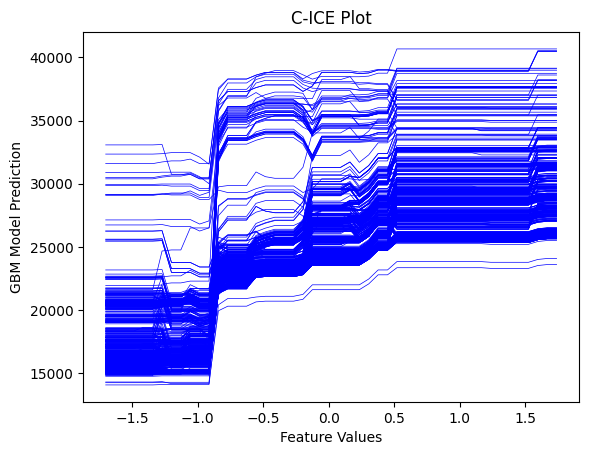

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


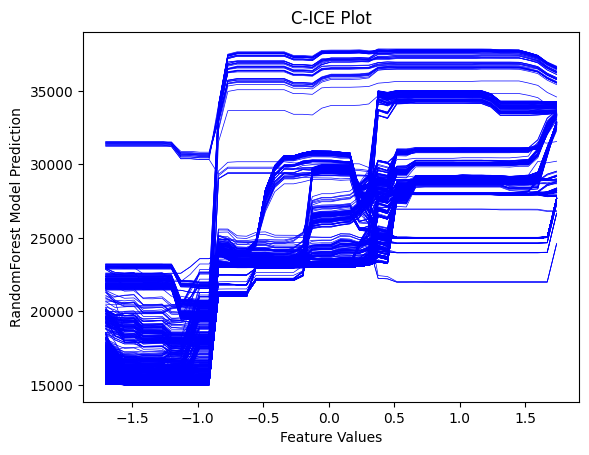

In [62]:
for name, model in best_models.items():
  from pycebox.ice import ice, ice_plot
  ice_df = ice(x, 'Age', model.predict)
  ice_plot(ice_df, c='blue', linewidth=0.5)
  plt.xlabel('Feature Values')
  plt.ylabel(f'{name} Model Prediction')
  plt.title('C-ICE Plot')
  plt.show()


## Deploying model

In [63]:
import pickle

In [64]:
filename='train_model.sav'
pickle.dump(random_forest_model,open(filename, 'wb'))

In [65]:
# loading the saved model
loaded_model=pickle.load(open('train_model.sav', 'rb'))

In [68]:
input_data=(45,0,0,0,0,155,57,0,0,0)
#changing the input data to numpy array
input_data_as_numpy_array=np.array(input_data)
#reshape the data as we are predicting for one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=loaded_model.predict(input_data_reshaped)
print(prediction)

[33739.60429385]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
